What you will create :
A scatter plot in plotnine with aesthetic mappings that visually distinguishes data points based on a categorical variable.
A stacked bar chart in plotnine to display the distribution of a categorical variable, segmented by another category.
A series of facet-wrapped plots in plotnine to compare subsets of data across different categories or conditions.
An interactive line chart in Plotly showcasing GDP per capita over time for a selected country from the Gapminder dataset.
A 3D scatter plot in Plotly that visually differentiates Iris flower species based on sepal and petal measurements.
An interactive heatmap in Plotly illustrating the frequency of flights between major US cities, with detailed hover-over information.
A Matplotlib time-series plot representing stock market trends over time, with features enabling users to zoom and pan through the large dataset.
An interactive Plotly scatter plot to analyze flight delay data, focusing on delay duration and time of the day, with hover details for deeper insights.


















Exercise 7: Visualizing Large Time-Series Data with Matplotlib
Objective:

Create a time-series plot using Matplotlib to visualize large-scale stock market data over time.

Instructions
Download the stock market dataset from the Yahoo Finance API (use yfinance Python package to access data for a major stock index like S&P 500 over the past 10 years).
Load the data into a pandas DataFrame.
Import matplotlib.pyplot.
Plot the closing prices (Close column) against the dates.
Ensure your plot handles the large dataset efficiently by aggregating data or using data sampling.
Customize the plot with a title, axis labels, and a grid.
Implement interactive features like zooming and panning for better usability.
Expected Learning Outcome:

Learn techniques for efficiently visualizing large time-series data using Matplotlib.



Exercise 8: Interactive Data Exploration with Plotly on Flight Delays Dataset
Objective:

Use Plotly to create an interactive scatter plot to explore a large dataset of flight delays, focusing on the relationship between the delay duration and the time of the day.

Dataset URL

Flight Delay Data

Instructions
Download the flight delay dataset from the provided URL, focusing on a single year of data for a comprehensive yet manageable size.
Load the data into a pandas DataFrame.
Import the necessary components from plotly.
Create an interactive scatter plot with the time of the day on the x-axis and delay duration on the y-axis.
Color-code the points based on the airline.
Add hover-over text displaying the flight number, departure, and arrival cities.
Customize the layout, including a title, axis labels, and a legend.
Expected Learning Outcome:

Develop skills in creating interactive visualizations for large datasets and learn how to extract meaningful insights from complex data patterns using Plotly.

Exercise 1: Creating a Scatter Plot with Aesthetic Mappings
Objective:

Use plotnine to create a scatter plot from a given dataset. The plot should map at least two variables to the x and y-axes and include an aesthetic mapping for color based on a third variable.

Instructions
Load your dataset into a pandas DataFrame.
Import the necessary components from plotnine.
Create a scatter plot using geom_point() where you map the x-axis to one variable and the y-axis to another.
Add an aesthetic mapping to color the points based on a third variable.
Customize the labels and title of the plot.
Display the plot.
Expected Learning Outcome:

Understand how to create scatter plots and apply aesthetic mappings in plotnine.



In [13]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from plotnine import * 
import plotly.express as px
from sklearn.datasets import load_iris
import datetime 
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf



iris = load_iris()
iris_df = pd.DataFrame(
    data = iris.data, 
    columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


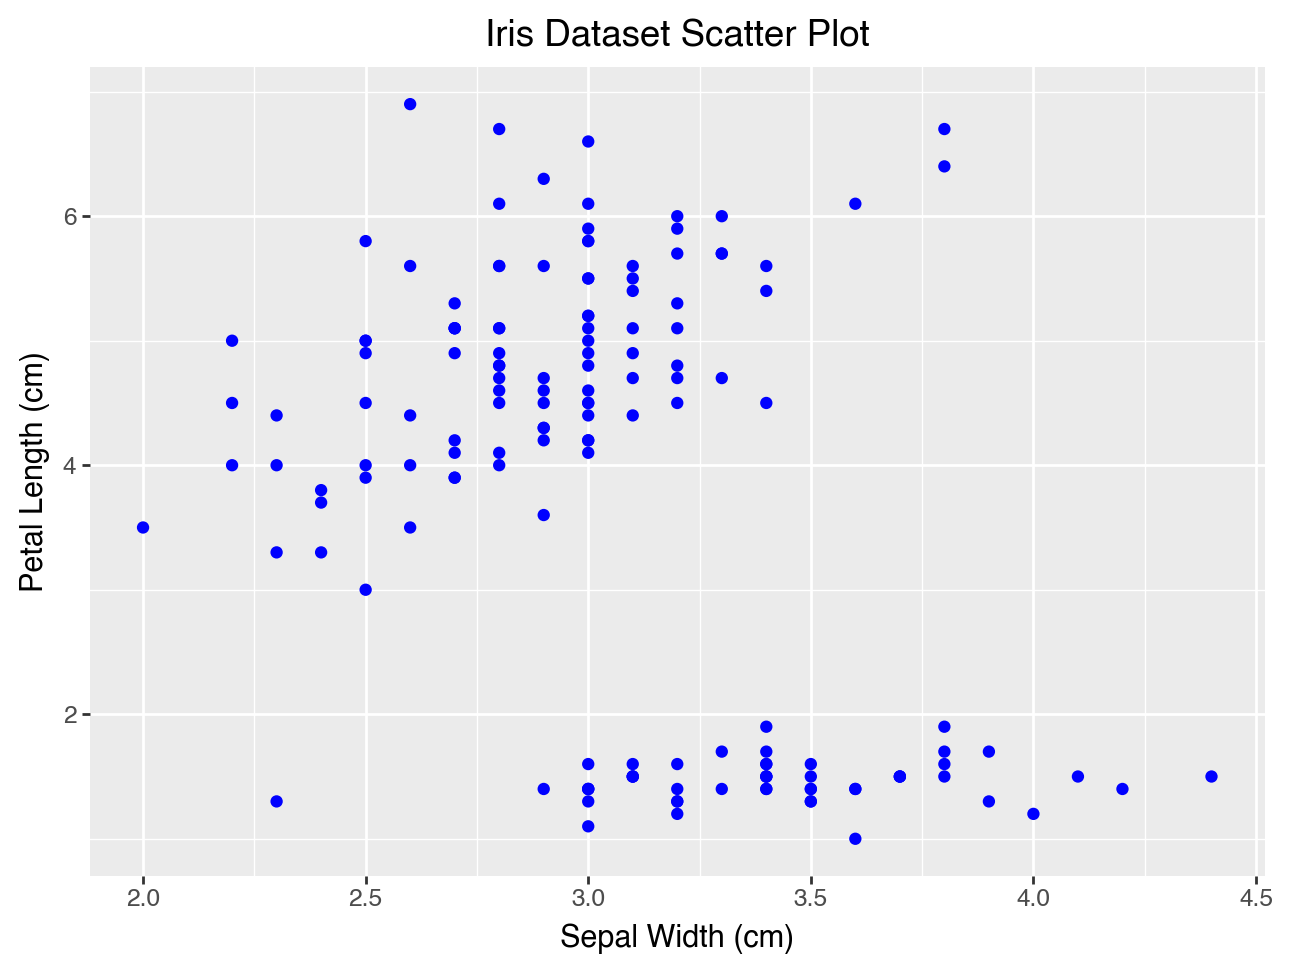

In [14]:
plot = (
    ggplot(iris_df, aes(x='sepal width (cm)', y='petal length (cm)')) +
    geom_point(color='blue') +  # Add points to the plot
    labs(
        title="Iris Dataset Scatter Plot",
        x="Sepal Width (cm)",
        y="Petal Length (cm)"
    )
)

# Display the plot
plot.show()


Exercise 2: Building a Stacked Bar Chart
Objective

Create a stacked bar chart using plotnine that visualizes the counts of a categorical variable, stacked by another categorical variable.

Instructions
- Load your dataset into a pandas DataFrame.
- Import the necessary components from plotnine.
- Use geom_bar() to create a bar chart. Ensure the bars are stacked.
- Map the x-axis to a categorical variable.
- Use the fill aesthetic to stack the bars based on another categorical variable.
- Add appropriate labels and a title to your chart.
- Display the plot.

Expected Learning Outcome:

- Learn to create and customize stacked bar charts in plotnine.


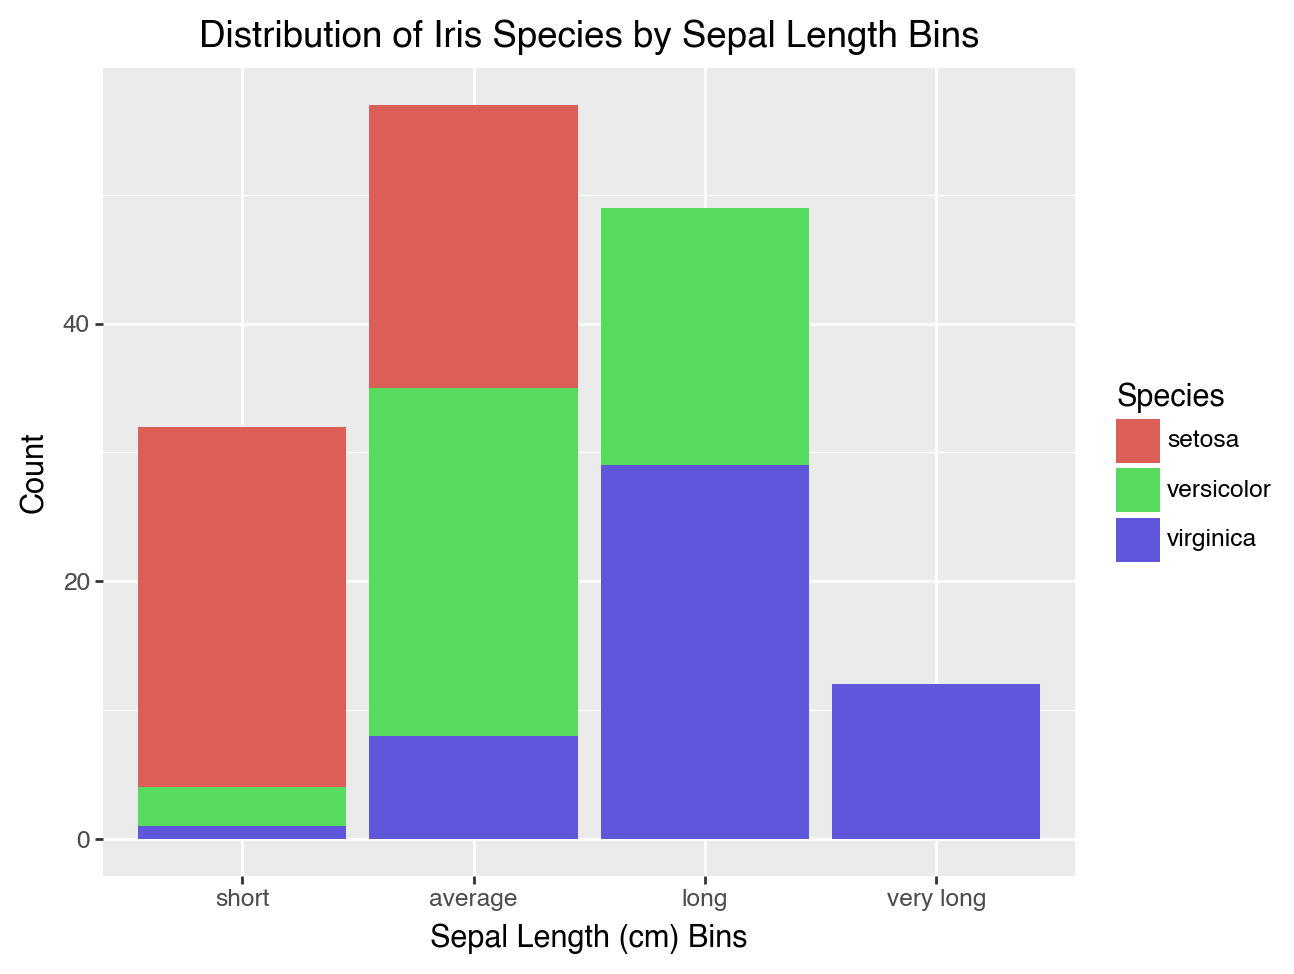

In [15]:
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Create a new categorical variable using pd.cut for 'sepal length (cm)'
bins = [4, 5, 6, 7, 8]  # Define bin edges
labels = ['short', 'average', 'long', 'very long']  # Define bin labels
iris_df['sepal_length_bins'] = pd.cut(iris_df['sepal length (cm)'], bins=bins, labels=labels)

# Create a stacked bar chart based on the new categorical variable
plot = (
    ggplot(iris_df, aes(x='sepal_length_bins', fill='species')) +  # Map x to bins and fill to species
    geom_bar() +  # Bar chart
    labs(
        title="Distribution of Iris Species by Sepal Length Bins",
        x="Sepal Length (cm) Bins",
        y="Count",
        fill="Species"
    )
)

plot.show()

Exercise 3: Exploring Facet Wrapping in Plotnine
Objective:

- Use plotnine to create a series of plots for different subsets of your data using facet wrapping.

Instructions
- Load your dataset into a pandas DataFrame.
- Import the necessary components from plotnine.
- Create a basic plot (like a scatter plot or bar chart) using your dataset.
- Apply facet_wrap() to your plot to create multiple panels, each representing a subset of your data based on a specified variable.
- Customize the layout and appearance of the facet grid.
- Add appropriate labels and titles to your plots.
- Display the final plot.
Expected Learning Outcome:

- Gain experience with creating multi-panel plots using facet wrapping in plotnine.



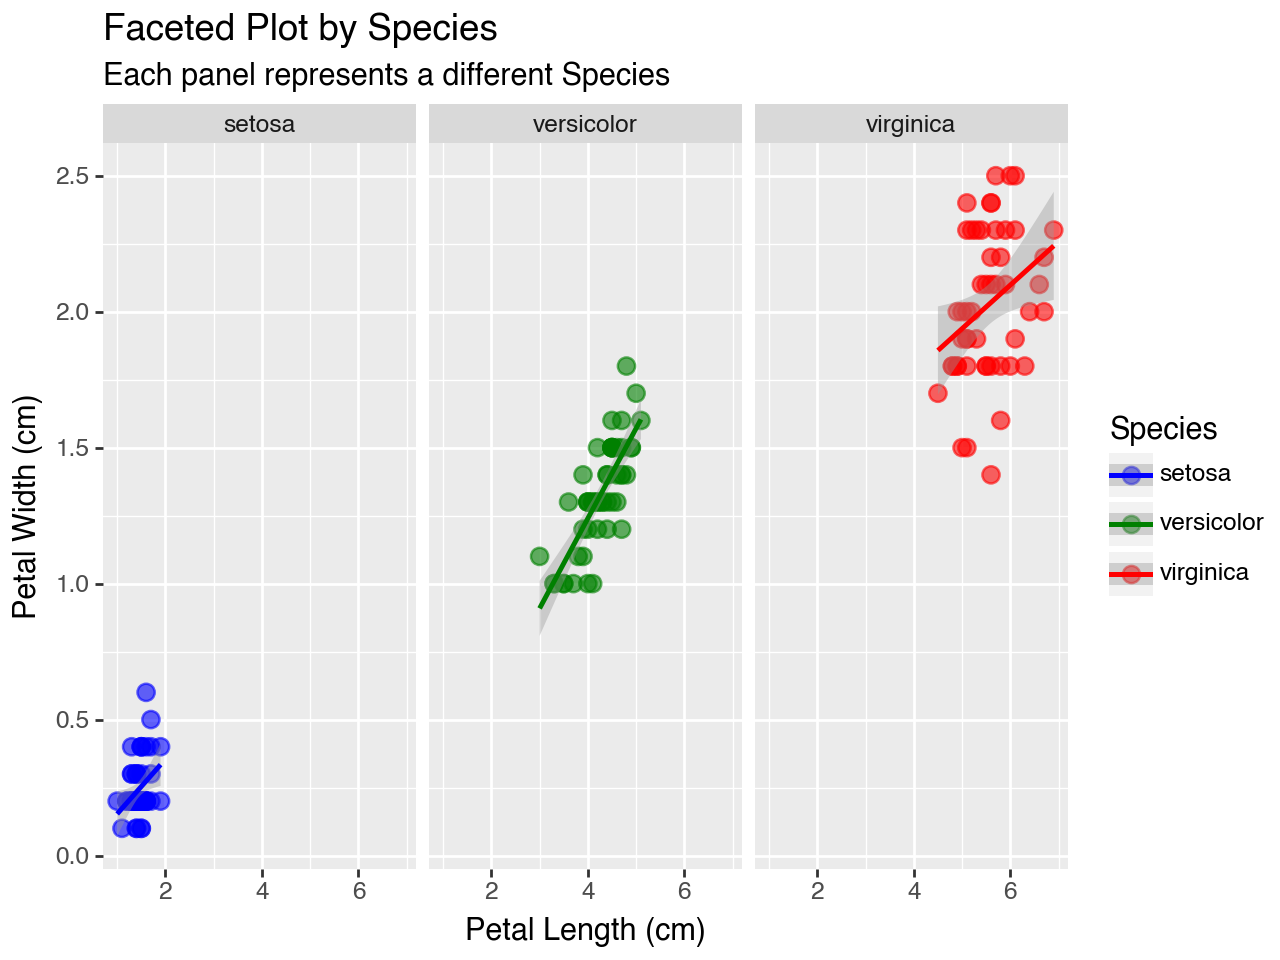

In [16]:
facet_plot = (ggplot(iris_df, aes(x='petal length (cm)', y='petal width (cm)', color='species')) +
              geom_point(size=3, alpha=0.6) +
              geom_smooth(method='lm', se=True) +
              facet_wrap('~species') +
              labs(title="Faceted Plot by Species",
                   subtitle="Each panel represents a different Species",
                   x="Petal Length (cm)",
                   y="Petal Width (cm)",
                   color="Species") +
              scale_color_manual(values=["blue", "green", "red"]))
facet_plot


Exercise 4: Interactive Line Chart with the Gapminder Dataset
Objective:

- Create an interactive line chart using Plotly that visualizes the GDP per capita over time for a selected country from the Gapminder dataset.

Instructions
- Load the GapMinder - Income Inequality Dataset into a pandas DataFrame.
- Import the necessary components from plotly.
- Filter the dataset for a specific country of your choice.
- Create a line chart that plots year on the x-axis and GDP per capita on the y-axis.
- Ensure the chart is interactive, allowing for hover-over details.
- Add appropriate labels and a title to your chart.

Expected Learning Outcome:

- Learn to create interactive line charts and handle time series data in Plotly.

Exercise 5: 3D Scatter Plot with the Iris Dataset
Objective:

- Use Plotly to create a 3D scatter plot that visualizes the three different species of the Iris dataset with respect to their sepal length, sepal width, and petal length.

Instructions
- Load the Iris dataset into a pandas DataFrame.
- Import the necessary components from plotly.
- Create a 3D scatter plot mapping sepal length, sepal width, and petal length to the three axes.
- Use color to distinguish between the different species.
- Add hover-over text for each data point displaying its species name.
- Include a descriptive title and axis labels.
Expected Learning Outcome:

- Understand how to create and customize 3D scatter plots in Plotly.

In [17]:
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
# Create the 3D scatter plot
fig = px.scatter_3d(iris_df, 
                    x='sepal length (cm)', 
                    y='sepal width (cm)', 
                    z='petal length (cm)', 
                    color='species',
                    title='3D Scatter Plot of Iris Species',
                    labels={'sepal length (cm)': 'Sepal Length (cm)',
                            'sepal width (cm)': 'Sepal Width (cm)',
                            'petal length (cm)': 'Petal Length (cm)',
                            'species': 'Species'})

# Show the plot
fig.show()

Exercise 6: Interactive Heatmap using Flight Data
Objective:

- Create an interactive heatmap using Plotly to visualize flight frequency between different US cities using a flight dataset.

Instructions
- Load a dataset containing flight frequencies between major US cities like this Airlines Dataset to predict a delay.
- Import the necessary components from plotly.
- Use the plotly.graph_objects module to create a heatmap.
- The x-axis should represent departure cities, and the y-axis should represent arrival cities.
- The color intensity of each cell in the heatmap should represent the number of flights.
- Ensure interactivity with hover-over text for each cell showing the exact number of flights.

Expected Learning Outcome:

- Gain skills in creating and interpreting heatmaps, and handling geographical data in Plotly.

In [18]:
Air_df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D3/EXERCISE XP/Airlines.csv')
df = Air_df[['Airline', 'DayOfWeek', 'Delay']].dropna()
heatmap_data = df.pivot_table(index='Airline', columns='DayOfWeek', values='Delay', aggfunc='mean')

heatmap_fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlOrRd', 
    colorbar=dict(title='Average Delay')
))

heatmap_fig.update_layout(
    title='Average Flight Delays by Airline and Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Airline',
)

# Show the heatmap
heatmap_fig.show()

Exercise 7: Visualizing Large Time-Series Data with Matplotlib
Objective:

Create a time-series plot using Matplotlib to visualize large-scale stock market data over time.

Instructions
Download the stock market dataset from the Yahoo Finance API (use yfinance Python package to access data for a major stock index like S&P 500 over the past 10 years).
Load the data into a pandas DataFrame.
Import matplotlib.pyplot.
Plot the closing prices (Close column) against the dates.
Ensure your plot handles the large dataset efficiently by aggregating data or using data sampling.
Customize the plot with a title, axis labels, and a grid.
Implement interactive features like zooming and panning for better usability.
Expected Learning Outcome:

Learn techniques for efficiently visualizing large time-series data using Matplotlib.

In [27]:
sp500 = yf.Ticker("^GSPC").history(period="10y")
sp500 = sp500.drop(columns=['Dividends', 'Stock Splits'])
sp500.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-11-25 00:00:00-05:00,5992.279785,6020.750000,5963.910156,5987.370117,5633150000
2024-11-26 00:00:00-05:00,6000.029785,6025.419922,5992.270020,6021.629883,3835170000
2024-11-27 00:00:00-05:00,6014.109863,6020.160156,5984.870117,5998.740234,3363340000
2024-11-29 00:00:00-05:00,6003.979980,6044.169922,6003.979980,6032.379883,2444420000
2024-12-02 00:00:00-05:00,6040.109863,6053.580078,6035.330078,6047.149902,4412470000


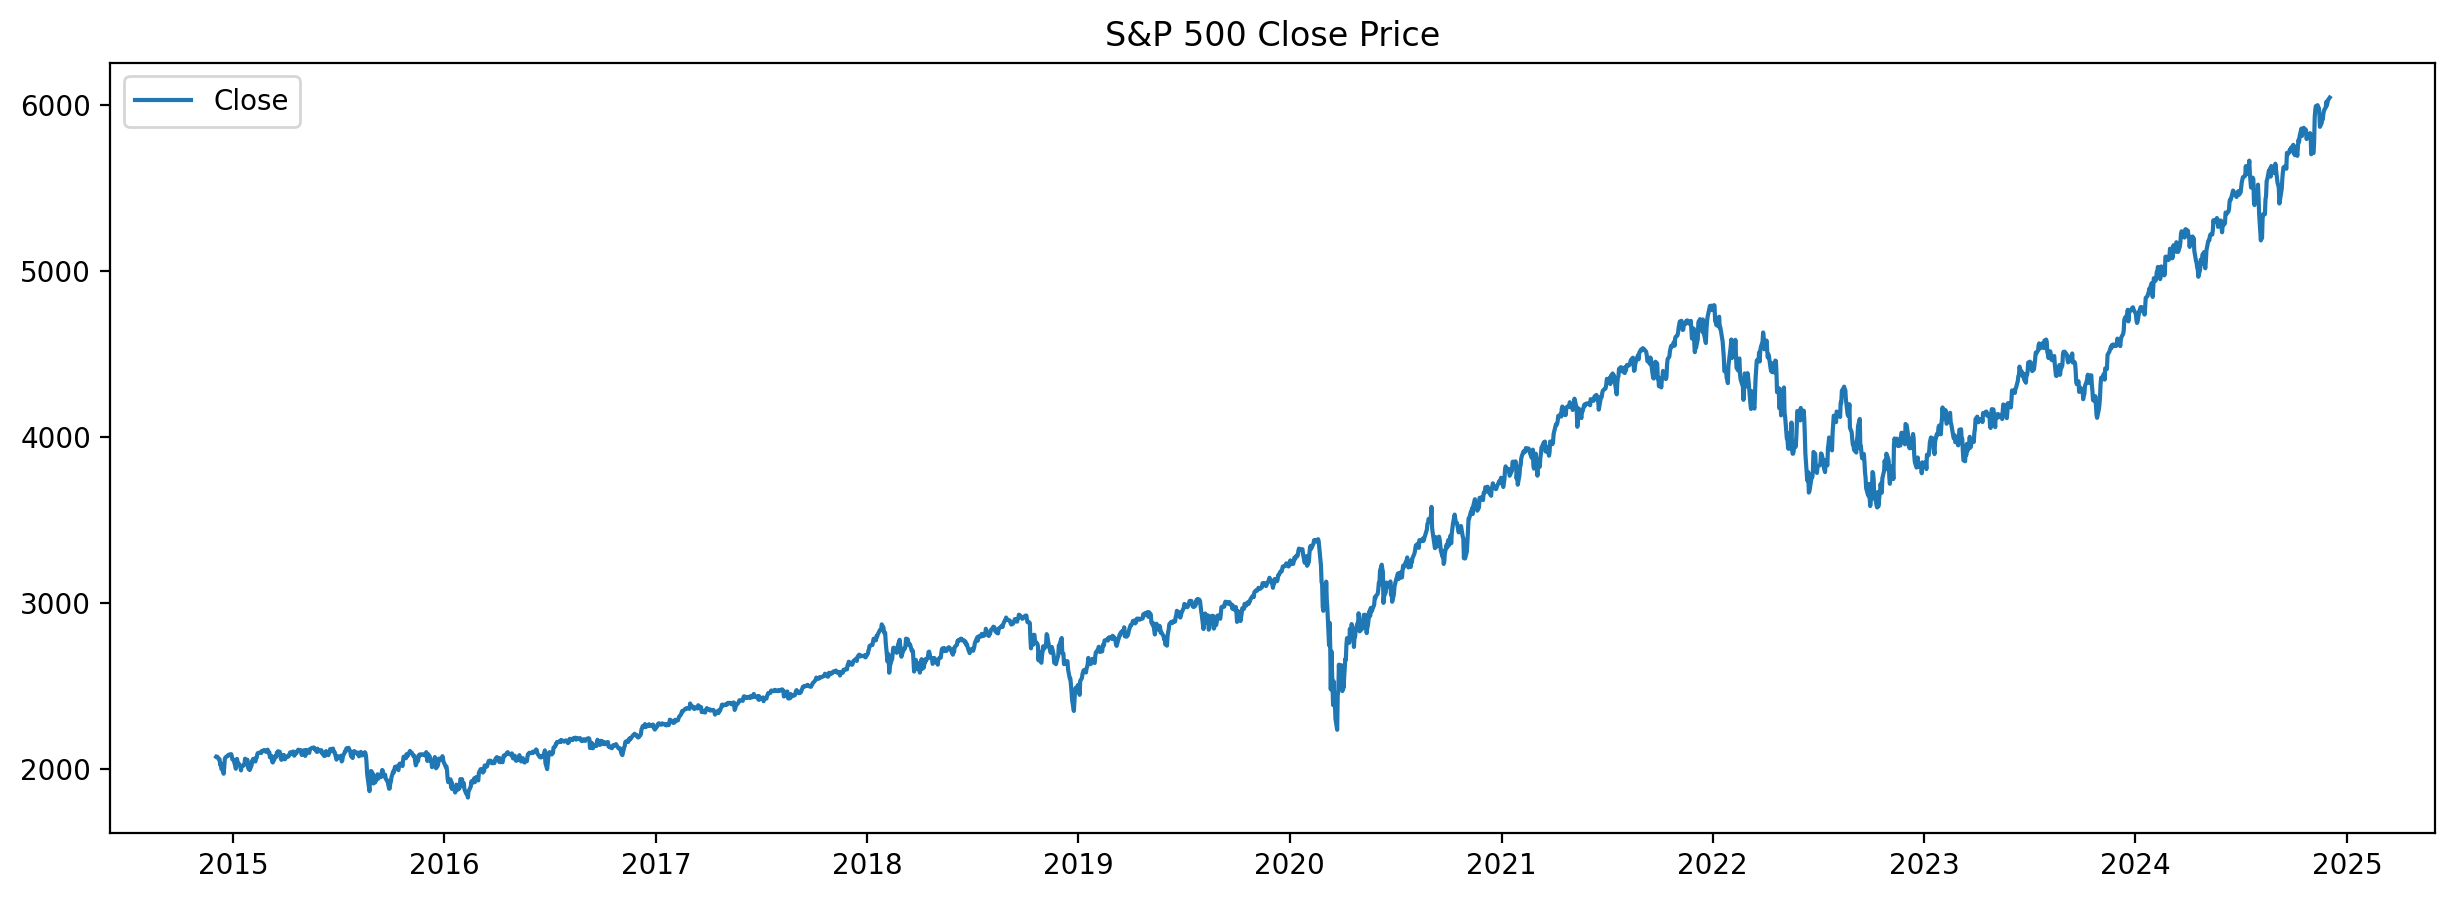

In [28]:
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Close Price')
plt.plot(sp500['Close'])
plt.legend(['Close'])
plt.show()

Exercise 8: Interactive Data Exploration with Plotly on Flight Delays Dataset
Objective:

- Use Plotly to create an interactive scatter plot to explore a large dataset of flight delays, focusing on the relationship between the delay duration and the time of the day.

Instructions
- Download the flight delay dataset from the provided URL, focusing on a single year of data for a comprehensive yet manageable size.
- Load the data into a pandas DataFrame.
- Import the necessary components from plotly.
- Create an interactive scatter plot with the time of the day on the x-axis and delay duration on the y-axis.
- Color-code the points based on the airline.
- Add hover-over text displaying the flight number, departure, and arrival cities.
- Customize the layout, including a title, axis labels, and a legend.

Expected Learning Outcome:

- Develop skills in creating interactive visualizations for large datasets and learn how to extract meaningful insights from complex data patterns using Plotly.



In [ ]:
import plotly.express as px
Air_delay_df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D3/EXERCISE XP/Airline_Delay_Cause.csv')


# Sample data
df = px.Air_delay_df()

# Create a scatter plot
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")

# Show the plot
fig.show()

In [32]:
Air_delay_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",85.0,8.0,4.00,0.49,...,0.00,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",85.0,16.0,7.98,2.00,...,0.00,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",178.0,23.0,10.96,1.36,...,0.00,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",82.0,18.0,7.06,0.00,...,0.00,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1919.0,215.0,67.74,8.05,...,0.00,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,2024,1,WN,Southwest Airlines,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",685.0,191.0,74.25,1.66,...,1.13,85.13,27.0,4.0,9326.0,3248.0,317.0,1012.0,37.0,4712.0
15056,2024,1,WN,Southwest Airlines,RIC,"Richmond, VA: Richmond International",140.0,35.0,14.17,0.00,...,0.00,17.81,0.0,0.0,1384.0,578.0,0.0,107.0,0.0,699.0
15057,2024,1,WN,Southwest Airlines,RNO,"Reno, NV: Reno/Tahoe International",705.0,134.0,39.02,0.52,...,0.08,80.49,12.0,7.0,6313.0,1464.0,75.0,1012.0,2.0,3760.0
15058,2024,1,WN,Southwest Airlines,ROC,"Rochester, NY: Frederick Douglass Grtr Rochest...",170.0,51.0,23.59,1.11,...,1.00,19.85,4.0,1.0,2520.0,1121.0,130.0,233.0,37.0,999.0
